In [1]:
import seaborn as sns
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 1
%aimport data
%aimport tf_deep

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder


/home/lpp/Desktop/deep-learning/logs


In [2]:
X, Y = data.sample_gmm_2d(5, 2, 10)
model = LogisticRegression(C=1e5)
model.fit(X, Y.ravel())

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

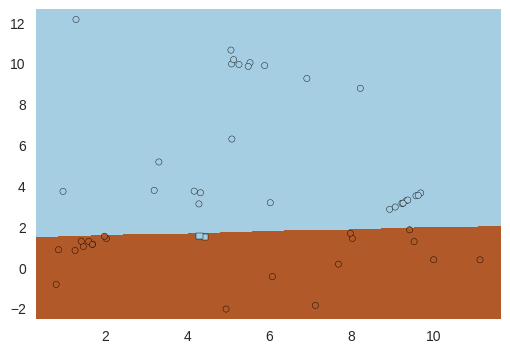

In [3]:
data.graph_data_pred(X, Y, model)

In [15]:
X, Y = data.sample_gmm_2d(4, 2, 40)
oh = OneHotEncoder(sparse=False)
oh.fit(Y)
Yoh = oh.transform(Y)

In [17]:
l = [2,2]
tflr = tf_deep.TFDeep(l, 0.001)
tflr.train(X, Yoh, 10000)
probs = tflr.eval(X)
ypp = np.argmax(probs, axis=1)
print(classification_report(Y.reshape(-1), ypp))
cm = confusion_matrix(Y.reshape(-1), ypp)
print("confusion matrix\n", cm)
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("True")

/home/lpp/Desktop/deep-learning/logs


InvalidArgumentError: You must feed a value for placeholder tensor 'X' with dtype float
	 [[Node: X = Placeholder[dtype=DT_FLOAT, shape=[], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op 'X', defined at:
  File "/usr/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/lib/python3.5/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/usr/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "/usr/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/usr/lib/python3.5/site-packages/tornado/ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "/usr/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/usr/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/usr/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/usr/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/usr/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/usr/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "/usr/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/usr/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/usr/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/usr/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/usr/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-5-2d855b2725dd>", line 2, in <module>
    tflr = tf_deep.TFDeep(l, 0.001)
  File "/home/lpp/Desktop/deep-learning/tf_deep.py", line 16, in __init__
    self.X = tf.placeholder(tf.float32, [None, layers[0]], "X_input")
  File "/usr/lib/python3.5/site-packages/tensorflow/python/ops/array_ops.py", line 1332, in placeholder
    name=name)
  File "/usr/lib/python3.5/site-packages/tensorflow/python/ops/gen_array_ops.py", line 1748, in _placeholder
    name=name)
  File "/usr/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 749, in apply_op
    op_def=op_def)
  File "/usr/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 2380, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/usr/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1298, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'X' with dtype float
	 [[Node: X = Placeholder[dtype=DT_FLOAT, shape=[], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]


In [7]:
Yoh.shape

(160, 1)

In [ ]:
data.graph_data_pred(X, Y, tflr)
tflr.sess.close()

In [ ]:
l = [2,10, 2]
tflr = tf_deep.TFDeep(l, 0.005)
tflr.train(X, Yoh, 40000)
probs = tflr.eval(X)
ypp = np.argmax(probs, axis=1)
print(classification_report(Y.reshape(-1), ypp))
cm = confusion_matrix(Y.reshape(-1), ypp)
print("confusion matrix\n", cm)
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("True")

In [ ]:
data.graph_data_pred(X, Y, tflr)
tflr.sess.close()

In [ ]:
l = [2,10, 10, 2]
tflr = tf_deep.TFDeep(l, 0.001)
tflr.train(X, Yoh, 40000)
probs = tflr.eval(X)
ypp = np.argmax(probs, axis=1)
print(classification_report(Y.reshape(-1), ypp))
cm = confusion_matrix(Y.reshape(-1), ypp)
print("confusion matrix\n", cm)
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("True")

In [ ]:
data.graph_data_pred(X, Y, tflr)
tflr.sess.close()

# 5.3.b

In [ ]:
X, Y = data.sample_gmm_2d(6, 2, 10)
oh = OneHotEncoder(sparse=False)
oh.fit(Y)
Yoh = oh.transform(Y)

In [ ]:
l = [2,2]
tflr = tf_deep.TFDeep(l, 0.005)
tflr.train(X, Yoh, 40000)
probs = tflr.eval(X)
ypp = np.argmax(probs, axis=1)
print(classification_report(Y.reshape(-1), ypp))
cm = confusion_matrix(Y.reshape(-1), ypp)
print("confusion matrix\n", cm)
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("True")

In [ ]:
data.graph_data_pred(X, Y, tflr)
tflr.sess.close()

In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10,), random_state=1)
clf.fit(X, Y)
ypp = clf.predict(X)
print(classification_report(Y.reshape(-1), ypp))
cm = confusion_matrix(Y.reshape(-1), ypp)
print("confusion matrix\n", cm)
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("True")

In [ ]:
data.graph_data_pred(X, Y, clf)

In [ ]:
l = [2,10, 2]
tflr = tf_deep.TFDeep(l, 0.005)
tflr.train(X, Yoh, 40000)
probs = tflr.eval(X)
ypp = np.argmax(probs, axis=1)
print(classification_report(Y.reshape(-1), ypp))
cm = confusion_matrix(Y.reshape(-1), ypp)
print("confusion matrix\n", cm)
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("True")

In [ ]:
data.graph_data_pred(X, Y, tflr)
tflr.sess.close()

In [ ]:
l = [2,10, 10, 2]
tflr = tf_deep.TFDeep(l, 0.005)
tflr.train(X, Yoh, 40000)
probs = tflr.eval(X)
ypp = np.argmax(probs, axis=1)
print(classification_report(Y.reshape(-1), ypp))
cm = confusion_matrix(Y.reshape(-1), ypp)
print("confusion matrix\n", cm)
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("True")

In [ ]:
data.graph_data_pred(X, Y, tflr)
tflr.sess.close()

In [ ]:
X, Y = data.sample_gmm_2d(6, 2, 10)
oh = OneHotEncoder(sparse=False)
oh.fit(Y)
Yoh = oh.transform(Y)

l = [2,10, 10, 2]
tflr = tf_deep.TFDeep(l, 0.005)
tflr.train(X, Yoh, 5000)
probs = tflr.eval(X)
ypp = np.argmax(probs, axis=1)
print(classification_report(Y.reshape(-1), ypp))
cm = confusion_matrix(Y.reshape(-1), ypp)
print("confusion matrix\n", cm)
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("True")

In [ ]:
data.graph_data_pred(X, Y, tflr)
tflr.sess.close()

In [ ]:
from sklearn.svm import SVC
model = SVC()
model.fit(X, Y.ravel())
data.graph_data_pred(X, Y, model)